In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
titanic = pd.read_csv('titanic.csv')

In [2]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# compute percentage of missing data for each feature
missing_percentage = titanic.isnull().sum()/len(titanic)*100

In [4]:
# select acceptable features, having less than 20% missing values
acceptable_features = missing_percentage[missing_percentage <= 20]

In [5]:
# create new dataframe with acceptable features only and drop all inputs having missing values
titanic_acceptable = titanic[acceptable_features.index].dropna()

In [6]:
titanic_acceptable.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
# add dummy columns for categorical variables (Sex, Embarked)
sex = pd.get_dummies(titanic_acceptable['Sex'],drop_first=True)
embarked = pd.get_dummies(titanic_acceptable['Embarked'],drop_first=True)
titanic_dummies = pd.concat([titanic_acceptable,sex,embarked],axis=1)

In [8]:
titanic_dummies.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [9]:
# choose dependant variable for classification
feature_class = 'Survived'

In [10]:
# select only numerical features
# eliminate id and dependent variables
titanic_use = titanic_dummies.select_dtypes(include='number').drop(['PassengerId','Survived'],axis=1)

In [11]:
titanic_use.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
male      0
Q         0
S         0
dtype: int64

In [12]:
# scale input data
from sklearn.preprocessing import StandardScaler
titanic_scaled = pd.DataFrame(StandardScaler().fit(titanic_use).transform(titanic_use), columns=titanic_use.columns)
titanic_scaled.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0.908600,-0.527669,0.522511,-0.506787,-0.516380,0.756138,-0.202326,0.534040
1,-1.482983,0.577094,0.522511,-0.506787,0.694046,-1.322511,-0.202326,-1.872519
2,0.908600,-0.251478,-0.552714,-0.506787,-0.503620,-1.322511,-0.202326,0.534040
3,-1.482983,0.369951,0.522511,-0.506787,0.350326,-1.322511,-0.202326,0.534040
4,0.908600,0.369951,-0.552714,-0.506787,-0.501257,0.756138,-0.202326,0.534040


Text(0, 0.5, 'Second Principal Component')

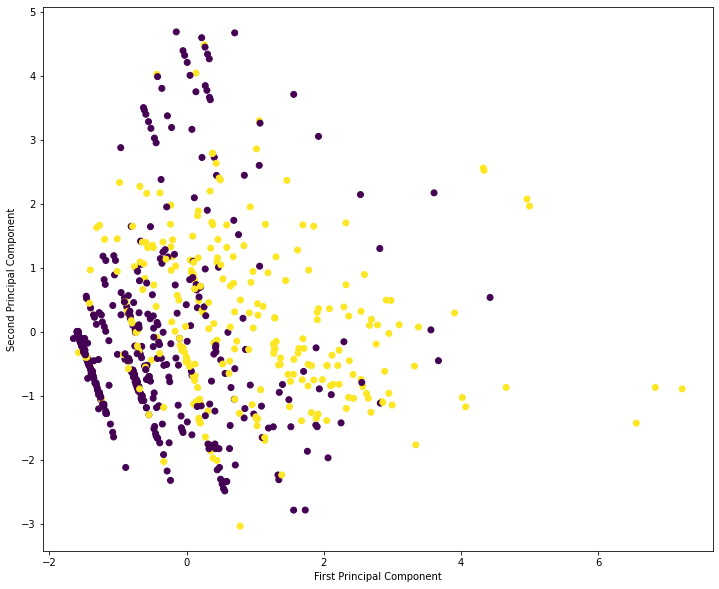

In [13]:
# PCA
from sklearn.decomposition import PCA
titanic_pca = PCA(n_components=2).fit_transform(titanic_scaled)

plt.figure(figsize = (12,10))
plt.scatter(x=titanic_pca[:,0], y=titanic_pca[:,1], c=titanic_acceptable[feature_class])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

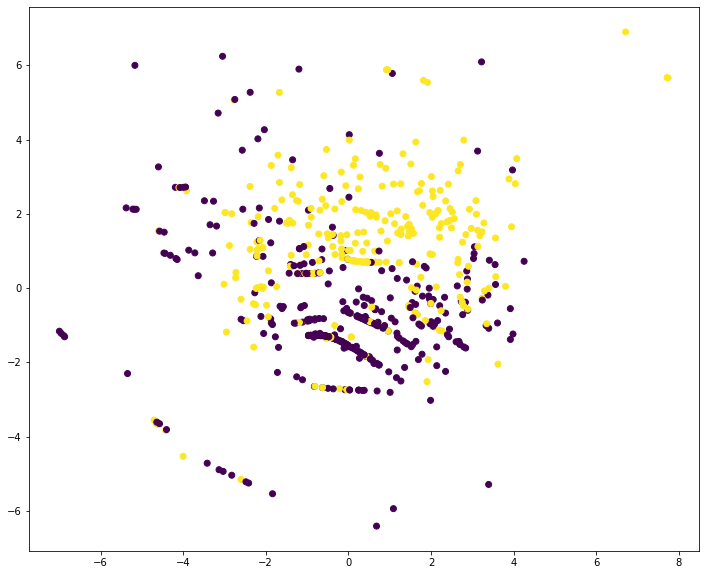

In [14]:
# MDS
from sklearn.manifold import MDS
titanic_mds = MDS().fit_transform(titanic_scaled)

plt.figure(figsize=(12,10))
plt.scatter(titanic_mds[:,0], titanic_mds[:,1], c=titanic_acceptable[feature_class])

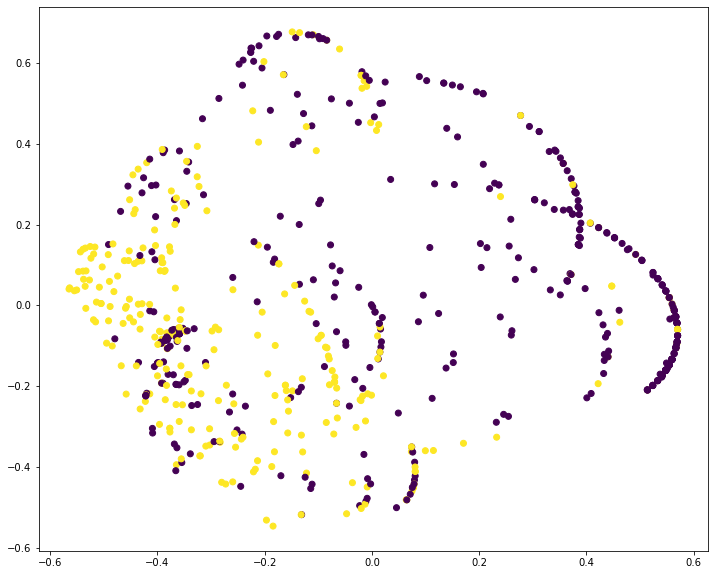

In [15]:
# Kernel PCA
from sklearn.decomposition import KernelPCA
titanic_kpca = KernelPCA(n_components=2, kernel='rbf').fit_transform(titanic_scaled)

plt.figure(figsize = (12,10))
plt.scatter(x=titanic_kpca[:,0], y=titanic_kpca[:,1], c=titanic_acceptable[feature_class])

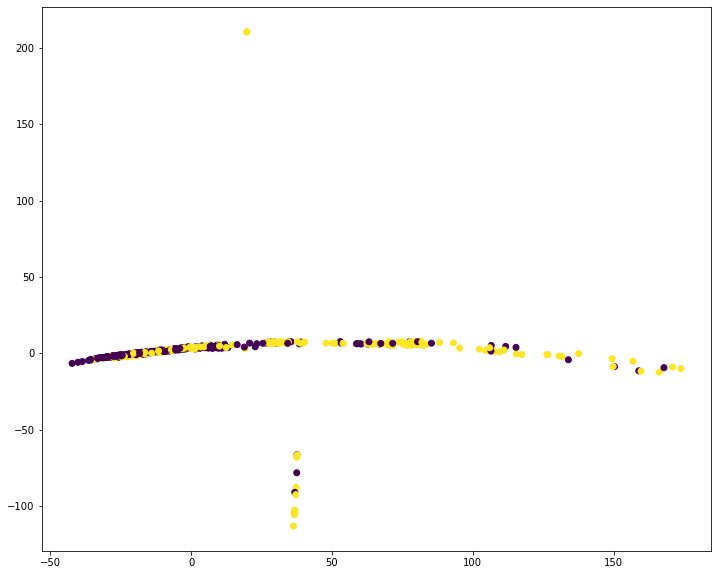

In [16]:
# ISOMAP
from sklearn.manifold import Isomap
titanic_isomap = Isomap(n_components=2).fit_transform(titanic_use)

plt.figure(figsize=(12,10))
plt.scatter(titanic_isomap[:,0], titanic_isomap[:,1], c=titanic_acceptable[feature_class])

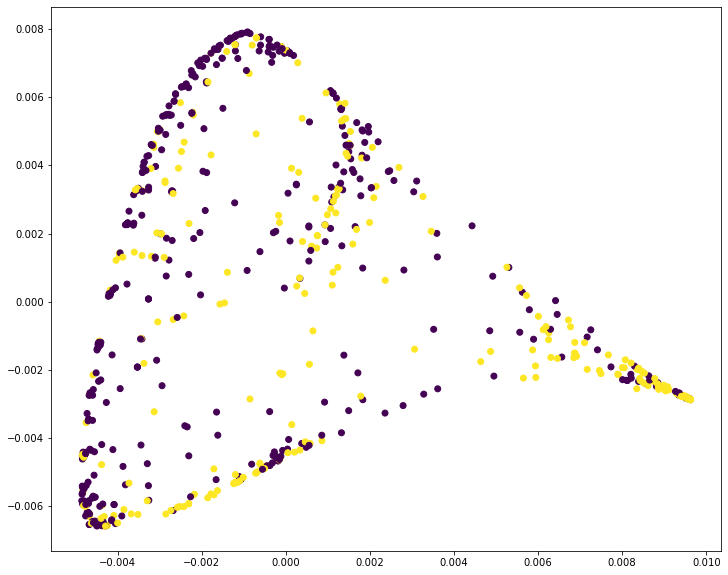

In [17]:
# Laplacian Eigenmaps / Spectral Embedding
from sklearn.manifold import SpectralEmbedding
titanic_se = SpectralEmbedding().fit_transform(titanic_use)

plt.figure(figsize=(12,10))
plt.scatter(titanic_se[:, 0], titanic_se[:, 1], c=titanic_acceptable[feature_class])

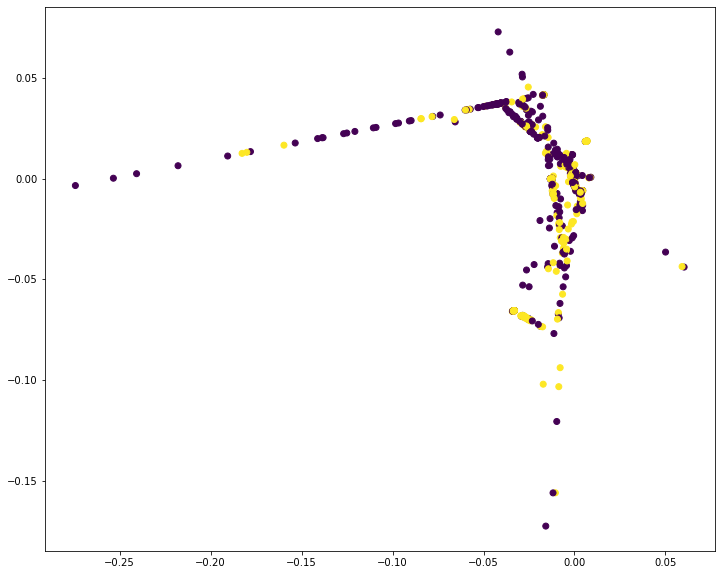

In [18]:
# LLE (default: n_neighbors = 5, n_components = 2)
from sklearn.manifold import LocallyLinearEmbedding
titanic_lle = LocallyLinearEmbedding().fit_transform(titanic_use)

plt.figure(figsize=(12,10))
plt.scatter(titanic_lle[:,0], titanic_lle[:,1], c=titanic_acceptable[feature_class])

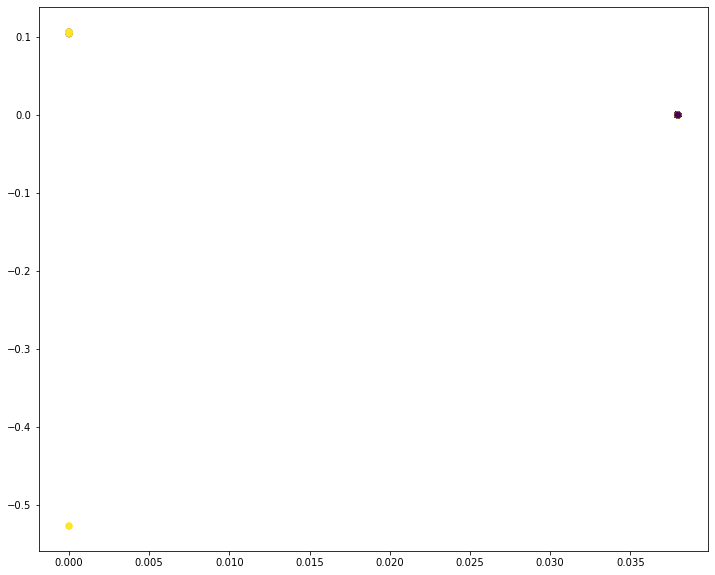

In [19]:
# Modified LLE (required: n_neighbors > n_components)
titanic_mlle = LocallyLinearEmbedding(method='modified').fit_transform(titanic_use)

plt.figure(figsize=(12,10))
plt.scatter(titanic_mlle[:,0], titanic_mlle[:,1], c=titanic_acceptable[feature_class])

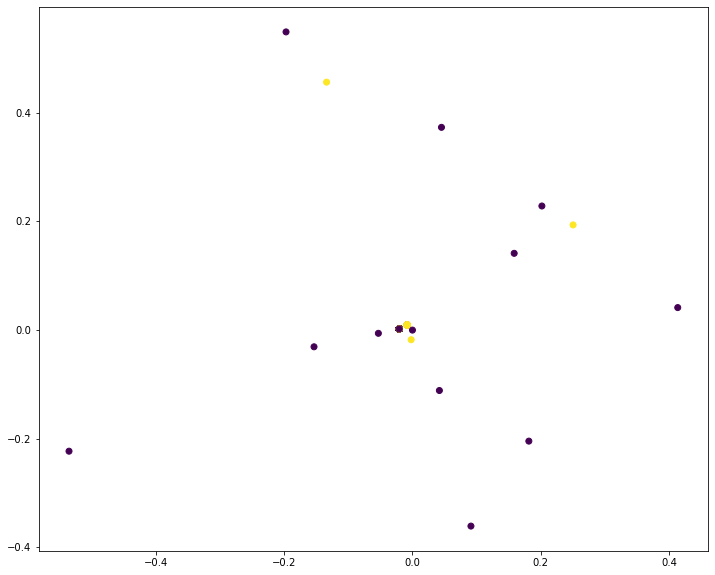

In [20]:
# Hessian LLE (required: n_neighbors > n_components * (n_components + 3) / 2)
titanic_hlle = LocallyLinearEmbedding(n_neighbors=6, eigen_solver='dense', method='hessian').fit_transform(titanic_use)

plt.figure(figsize=(12,10))
plt.scatter(titanic_hlle[:,0], titanic_hlle[:,1], c=titanic_acceptable[feature_class])

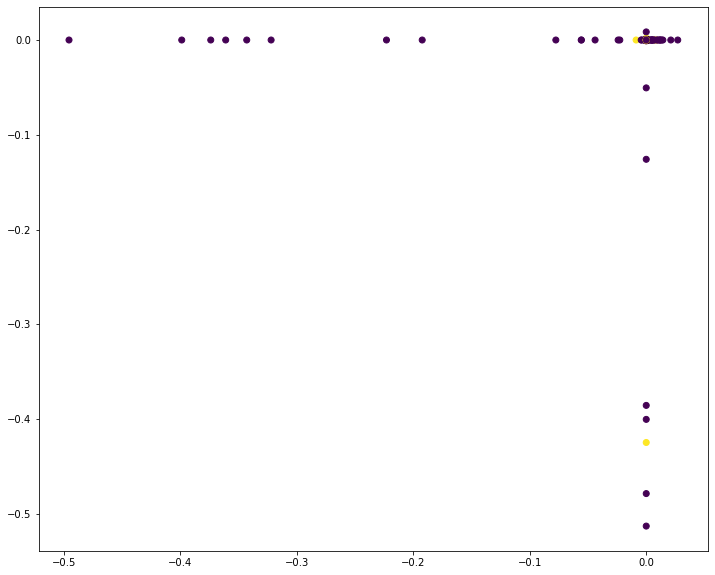

In [21]:
# LTSA
titanic_ltsa = LocallyLinearEmbedding(eigen_solver='dense', method='ltsa').fit_transform(titanic_use)
plt.figure(figsize=(12,10))
plt.scatter(titanic_ltsa[:,0], titanic_ltsa[:,1], c=titanic_acceptable[feature_class])

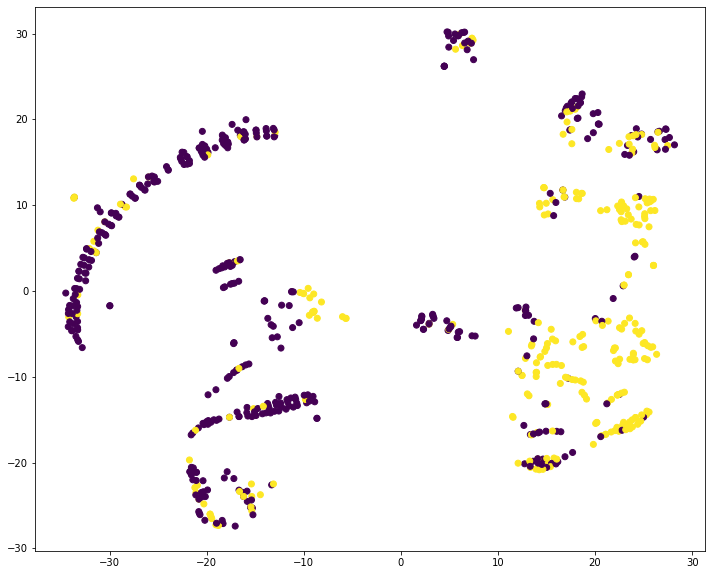

In [22]:
# t-SNE
from sklearn.manifold import TSNE
titanic_tsne = TSNE().fit_transform(titanic_scaled)

plt.figure(figsize=(12,10))
plt.scatter(titanic_tsne[:,0], titanic_tsne[:,1], c=titanic_acceptable[feature_class])

In [23]:
# check reduced dimensions
print('Output shapes\nPCA ')
print(titanic_pca.shape)
print('MDS')
print(titanic_mds.shape)
print('KPCA')
print(titanic_kpca.shape)
print('Isomap')
print(titanic_isomap.shape)
print('SE')
print(titanic_se.shape)
print('LLE')
print(titanic_lle.shape)
print('Modified LLE')
print(titanic_mlle.shape)
print('Hessian LLE')
print(titanic_hlle.shape)
print('LTSA')
print(titanic_ltsa.shape)
print('t-SNE')
print(titanic_tsne.shape)

Output shapes
PCA 
(712, 2)
MDS
(712, 2)
KPCA
(712, 2)
Isomap
(712, 2)
SE
(712, 2)
LLE
(712, 2)
Modified LLE
(712, 2)
Hessian LLE
(712, 2)
LTSA
(712, 2)
t-SNE
(712, 2)


In [24]:
# create lists of reduced objects and their corresponding names
titanic_red = [titanic_pca,titanic_mds,titanic_kpca,titanic_isomap,titanic_se,titanic_lle,
               titanic_mlle,titanic_hlle,titanic_ltsa,titanic_tsne]
titanic_red_names = ['titanic_pca','titanic_mds','titanic_kpca','titanic_isomap','titanic_se','titanic_lle','titanic_mlle',
                       'titanic_ltsa','titanic_tsne','titanic_umap']

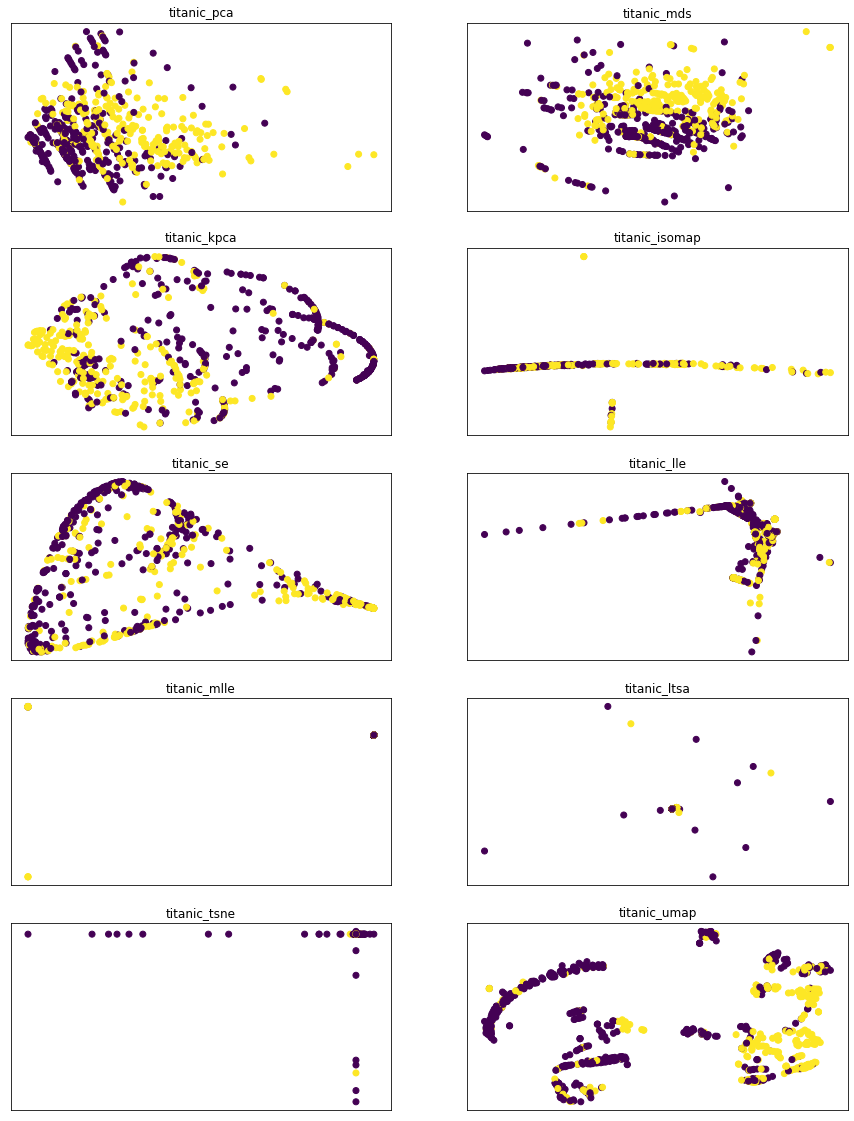

In [25]:
# construct a 5x2 diagram with all the visualisations
fig, axes = plt.subplots(5, 2, figsize=(15, 20), subplot_kw={'xticks': [], 'yticks': []})
for ax, tit, titan in zip(axes.flat, titanic_red, titanic_red_names):
    ax.scatter(tit[:,0], tit[:,1], c=titanic_acceptable[feature_class])
    ax.set_title(titan)
plt.show()